c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


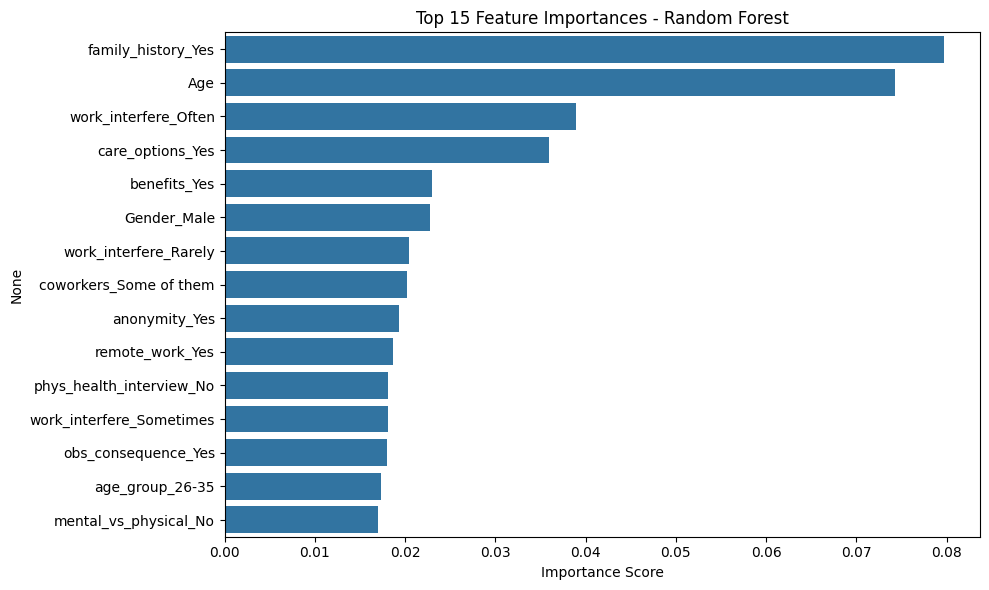

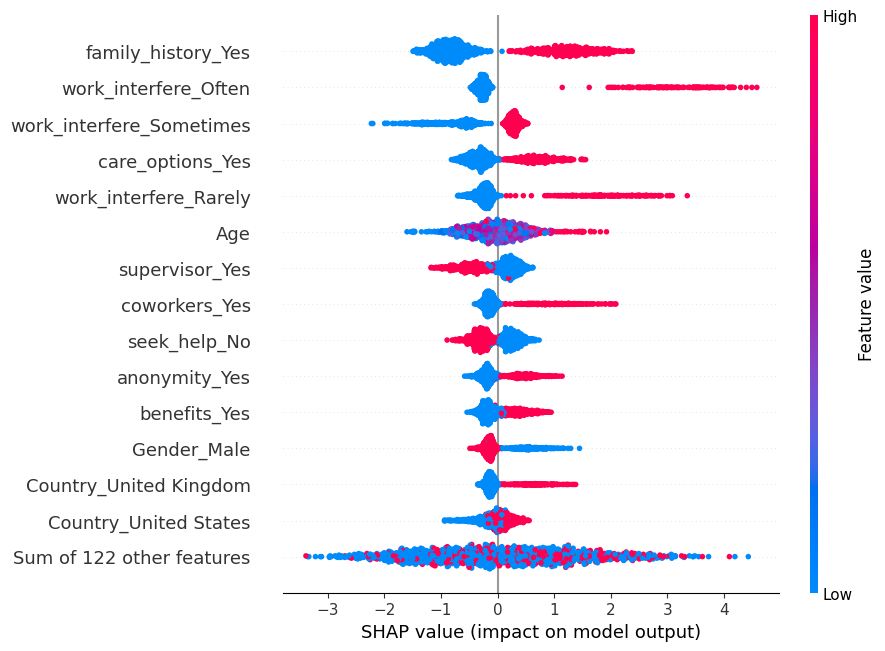

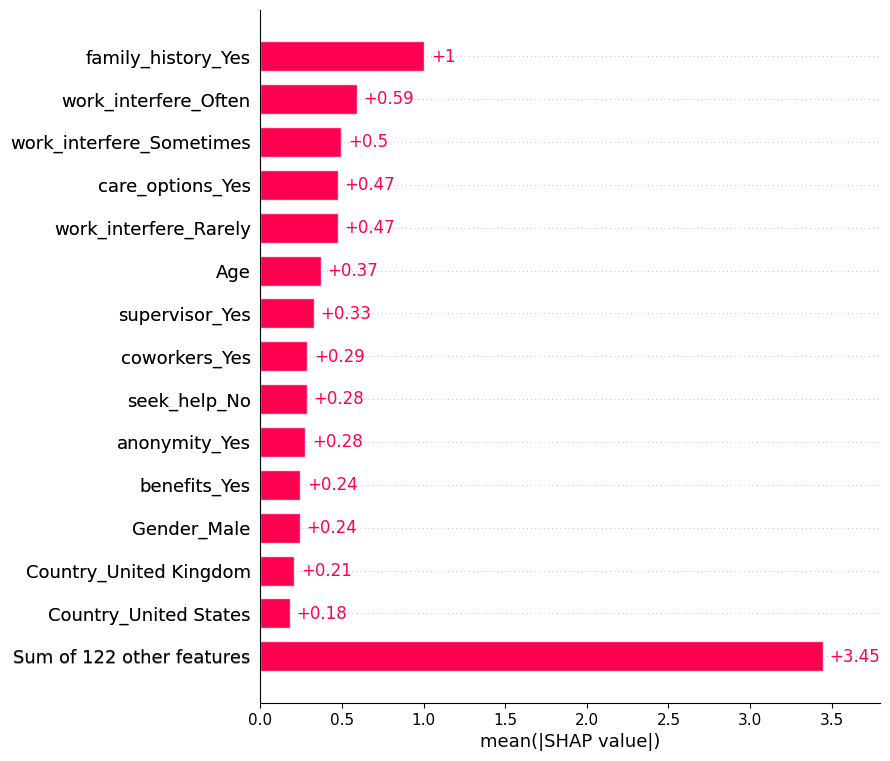

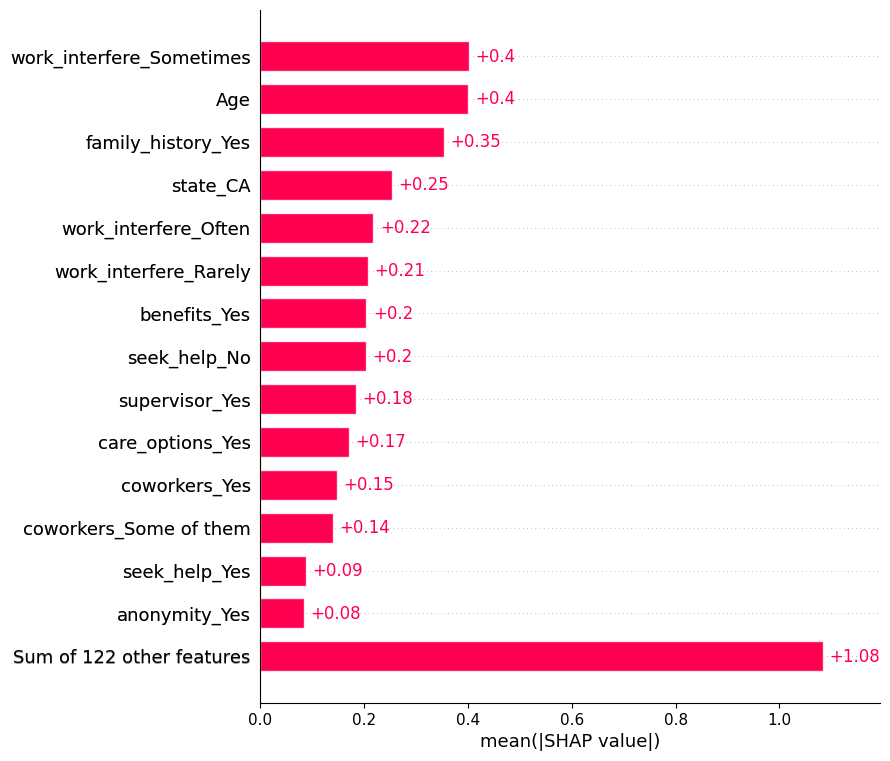

In [3]:
# Importing required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import pickle
import warnings
warnings.filterwarnings("ignore")

# Loading the processed dataset.
df_encoded = pd.read_csv('../data/processed/mental_health_cleaned.csv')

# Splitting into features and target.
X = df_encoded.drop(columns=['treatment_Yes'])
y = df_encoded['treatment_Yes']

# Loading trained models.
with open('../models/logistic_regression_model.pkl', 'rb') as f:
    log_reg = pickle.load(f)

with open('../models/random_forest_model.pkl', 'rb') as f:
    rf_clf = pickle.load(f)

with open('../models/xgboost_model.pkl', 'rb') as f:
    xgb_clf = pickle.load(f)

# Feature Importance (Random Forest).
# Getting and plotting feature importances.
importances_rf = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances_rf = importances_rf.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf[:15], y=importances_rf.index[:15])
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# SHAP Explanation (XGBoost).
# Creating SHAP explainer and computing SHAP values.
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X)

# SHAP summary plot (global feature impact).
shap.plots.beeswarm(shap_values, max_display=15)

# SHAP bar plot (mean absolute SHAP value).
shap.plots.bar(shap_values, max_display=15)

# SHAP Explanation (Logistic Regression).
explainer_log = shap.Explainer(log_reg, X)
shap_values_log = explainer_log(X)

shap.plots.bar(shap_values_log, max_display=15)


In [2]:
!python -m pip install --upgrade pip shap

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 598.5 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 838.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 838.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 838.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 838.9 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 565.4 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 565.4 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 565.4 kB/s eta 0:00:02
   ----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
